# コンペ

配布する訓練データを用いて2クラス分類問題を学習させる

配布するテストデータ（x_test.csv）に対するyのバイナリの予測値を一次元配列の形でcsvファイルとして提出

# Baseデータ導入

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Dataset Input

In [2]:
import pandas as pd
x_train_base = pd.read_csv('C:/Users/histan/Desktop/Personal Files/立教大学/M1授業/機械学習/コンペ/x_train.csv',sep=' ',header=None)
y_train_base = pd.read_csv('C:/Users/histan/Desktop/Personal Files/立教大学/M1授業/機械学習/コンペ/y_train.csv',sep= ' ',header=None)
x_test_base = pd.read_csv('C:/Users/histan/Desktop/Personal Files/立教大学/M1授業/機械学習/コンペ/x_test.csv',sep=' ',header=None)

In [3]:
x_train_base.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.012757,1.897221,0.520996,1.435542,1.849064,-1.264626,0.627079,-0.920659,0.539750,-0.312272,0.975975,0.901484,0.819665,0.421595,1.001530,0.397314,1.572504,0.196935
1,0.621812,-1.580552,-1.345890,1.028992,-1.966537,-0.125180,0.490500,1.197717,0.736300,-0.143922,0.666057,0.737283,0.982290,1.259029,0.665744,0.937344,0.780005,0.065450
2,0.526645,0.051776,-0.562946,0.612779,0.677274,-1.690096,0.757702,0.748714,1.137404,-0.444139,0.498859,0.812381,1.445102,1.428182,0.551686,1.096294,1.551007,0.227828
3,0.688602,-1.716990,0.052058,1.070484,-1.410744,0.970631,0.799757,-1.528619,1.200534,-0.379906,0.702266,1.030790,1.302522,1.960765,0.694347,1.460678,0.795701,0.208629
4,0.386417,0.251425,0.079647,0.611521,0.091048,-1.525142,0.314000,0.938232,0.471176,0.025881,0.393962,0.406990,0.916739,0.409799,0.408410,0.374729,1.482241,0.015186


In [4]:
y_train_base.shape

(410000, 1)

PCA主成分分析で各主成分の分散比率をチェックする

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=18) 
x_train_pca = pca.fit_transform(x_train_base)

print("各主成分の分散比率:")
print(pca.explained_variance_ratio_)


各主成分の分散比率:
[1.97571303e-01 1.66413828e-01 1.51744539e-01 1.25220531e-01
 1.24981091e-01 7.82956771e-02 7.08176088e-02 3.18241587e-02
 1.48537608e-02 1.27092520e-02 1.06606737e-02 5.44598549e-03
 4.06399302e-03 2.47250651e-03 1.42120375e-03 9.35403716e-04
 5.11622922e-04 5.68611985e-05]


1と0のインスタンス数をヒストグラムで見てみると

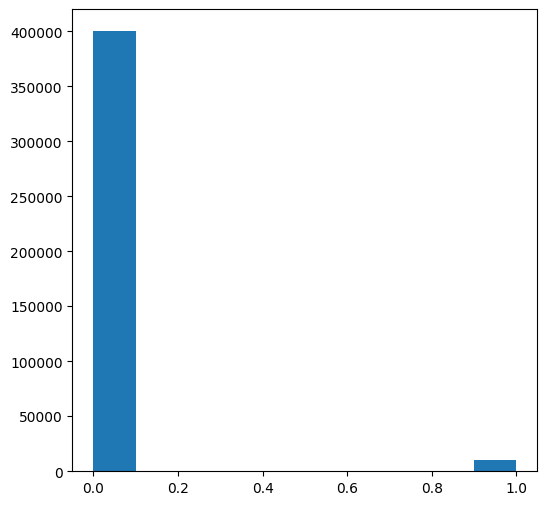

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(y_train_base)
plt.show()

かなり不均衡ですが、とりあえず、そのまま進む

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_base, y_train_base, test_size=0.3, random_state=456)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((287000, 18), (123000, 18), (287000, 1), (123000, 1))

x_train.shape = (287000, 18) and y_train.shape = (287000, 1)

x_test.shape = (123000, 18) and y_test.shape = (123000, 1)


データの前処理:いつも通り、スケーラーを適用します：

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[-0.18204524, -0.2696391 ,  0.10603142, ...,  0.57410121,
         0.71579915,  1.95437939],
       [ 0.19728833, -1.23397186,  0.06761965, ...,  0.3687695 ,
         0.27452046,  0.22887773],
       [-0.68385209,  1.14096169, -1.08833562, ...,  0.21455697,
         0.85739563,  1.63425952],
       ...,
       [-0.38103767,  1.46342058, -1.44978142, ..., -1.36962363,
         1.06690416, -0.74912136],
       [ 2.27410596,  1.03651666, -1.56726587, ..., -0.29940593,
        -1.20518033, -0.48977757],
       [-0.22725163, -0.45108225,  0.69385348, ..., -1.04908694,
        -1.63585722, -0.86513476]])

# ロジスティック回帰モデルDefault

学習と検証:ロジスティック回帰モデル、デフォルトの設定のまま使って見ましょう：

In [ ]:
from sklearn.linear_model import LogisticRegression

clf0 = LogisticRegression()

In [ ]:
clf0.fit(x_train_scaled,np.reshape(y_train,(-1)))

LogisticRegression()

今回の訓練f1-scoreは

In [ ]:
from sklearn.metrics import f1_score
y_pred = clf0.predict(x_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.3478


あまり良くないの結果だ…

# ロジスティック回帰モデル、class_weightとL2正則化Cのtuning

ｘのデータには若干のクラス不均衡があります。`class_weight`という引数について調べて、クラス不均衡を緩和した学習もさせて

 ---

In [ ]:
class_weights = {0: 1, 1: 2}  # クラス1の重みを2倍に設定
clf1 = LogisticRegression(class_weight=class_weights)
clf1.fit(x_train_scaled,np.reshape(y_train,(-1)))
y_pred = clf1.predict(x_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.3883


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.logspace(-4, 4, 10), #10^-4から10^4までの対数
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,20,20)]
}
clf2 = LogisticRegression()
grid_search = GridSearchCV(clf2, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_scaled, np.reshape(y_train,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')


Best parameters: {'C': 0.005994842503189409, 'class_weight': {0: 1, 1: 5.0}}
F1 Score with best parameters: 0.4036


F1 Scoreはちょっと良くなった

# 勾配降下法でロジスティック回帰

まず、'log_loss', penalty='l2', alpha=0.01の場合、実行してみる

In [ ]:
from sklearn.linear_model import SGDClassifier
class_weights = {0: 1, 1: 2}  # クラス1の重みを2倍に設定
clf3 = SGDClassifier(class_weight=class_weights,loss='log_loss', penalty='l2', alpha=0.01, max_iter=5000)
clf3.fit(x_train_scaled,np.reshape(y_train,(-1)))

SGDClassifier(alpha=0.01, class_weight={0: 1, 1: 2}, loss='log_loss',
              max_iter=5000)

In [ ]:
from sklearn.metrics import f1_score
y_pred = clf3.predict(x_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.3283


alpha=0.0001の場合

In [ ]:
from sklearn.linear_model import SGDClassifier
class_weights = {0: 1, 1:5}  # クラス1の重みを5倍に設定
clf4 = SGDClassifier(class_weight=class_weights,loss='hinge', penalty='l1', alpha=0.0001, max_iter=5000)
clf4.fit(x_train_scaled,np.reshape(y_train,(-1)))

y_pred = clf4.predict(x_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.3808


Tuningしてみる

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,10,10)],
    'alpha': np.logspace(-4, 4, 10),
    'max_iter': [5000]
}
clf4 = SGDClassifier()
grid_search = GridSearchCV(clf4, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_scaled, np.reshape(y_train,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Best parameters: {'alpha': 0.005994842503189409, 'class_weight': {0: 1, 1: 8.0}, 'max_iter': 5000}
F1 Score with best parameters: 0.4020


大体同じで、F1 Scoreは0.4020だ


# SMOTE Resampling前処理で、モデルTrainingする

手順はSMOTE前処理→Split→Scaler→Fitting→Tuning

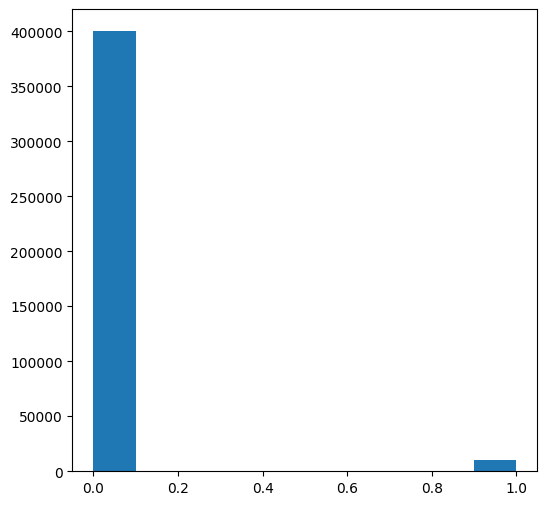

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(y_train_base)
plt.show()

ラベルとても不平衡の場合に、いい分類性能を取るために

SMOTE (Synthetic Minority Over-sampling Technique)を試す

SMOTEは、少数クラスのサンプルを増やすために、新しい合成サンプルを生成する

合成サンプルは、既存の少数クラスサンプルとその近傍のサンプルとの間の線形補間によって作成される

リサンプリング後のクラス分布:


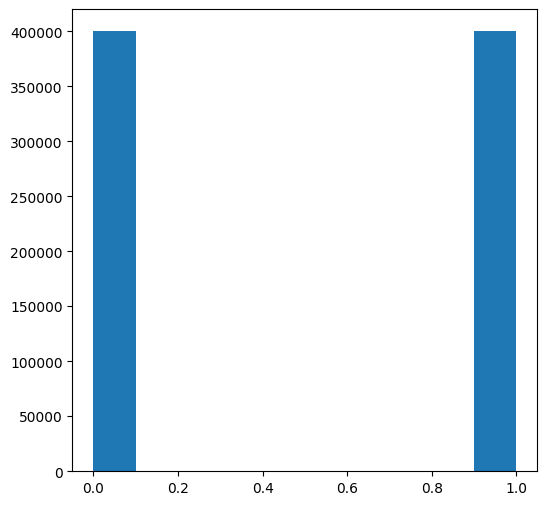

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_base, y_train_base)
print("リサンプリング後のクラス分布:")
plt.figure(figsize=(6,6))
plt.hist(y_train_resampled)
plt.show()

In [ ]:
x_train_resampled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.012757,1.897221,0.520996,1.435542,1.849064,-1.264626,0.627079,-0.920659,0.539750,-0.312272,0.975975,0.901484,0.819665,0.421595,1.001530,0.397314,1.572504,0.196935
1,0.621812,-1.580552,-1.345890,1.028992,-1.966537,-0.125180,0.490500,1.197717,0.736300,-0.143922,0.666057,0.737283,0.982290,1.259029,0.665744,0.937344,0.780005,0.065450
2,0.526645,0.051776,-0.562946,0.612779,0.677274,-1.690096,0.757702,0.748714,1.137404,-0.444139,0.498859,0.812381,1.445102,1.428182,0.551686,1.096294,1.551007,0.227828
3,0.688602,-1.716990,0.052058,1.070484,-1.410744,0.970631,0.799757,-1.528619,1.200534,-0.379906,0.702266,1.030790,1.302522,1.960765,0.694347,1.460678,0.795701,0.208629
4,0.386417,0.251425,0.079647,0.611521,0.091048,-1.525142,0.314000,0.938232,0.471176,0.025881,0.393962,0.406990,0.916739,0.409799,0.408410,0.374729,1.482241,0.015186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1.686402,-1.176355,-1.135546,1.081114,0.897008,0.553520,1.566163,0.648851,0.373381,-1.074032,2.067273,1.794778,0.778807,0.005419,2.115465,1.927173,1.232351,0.211973
799996,1.958742,0.986234,-0.087092,1.103172,0.067736,1.564237,1.556627,-0.151655,0.457481,1.806686,1.554264,1.148349,0.672516,0.381750,1.406653,0.349071,1.190562,0.065267
799997,0.711295,-0.057257,-0.667990,1.091951,-1.081585,-1.385875,0.951297,0.329806,1.192445,-0.391320,0.853010,1.140684,1.187797,2.304189,0.828317,1.725257,0.782580,0.125705
799998,0.892007,-0.689421,1.415186,0.627257,0.685733,-0.085432,4.255961,1.078448,3.754708,4.325522,0.866970,1.399437,1.432417,0.000000,1.059429,2.013067,1.520565,0.346735


In [ ]:
from sklearn.model_selection import train_test_split

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)

In [ ]:
x_train_sm.shape, x_test_sm.shape, y_train_sm.shape, y_test_sm.shape

((560000, 18), (240000, 18), (560000, 1), (240000, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_sm)
x_train_sms = scaler.transform(x_train_sm)
x_test_sms = scaler.transform(x_test_sm)
x_train_sms

array([[-0.35874437,  0.17808371, -1.52994766, ...,  1.043821  ,
         0.7681417 ,  1.51280417],
       [-0.98519841,  0.72519807,  1.21672611, ...,  1.22168751,
         1.27052687,  0.79333885],
       [-0.00776834,  0.76245282,  0.59314172, ..., -0.79698775,
         1.04443044,  0.79056506],
       ...,
       [-0.25339463, -0.8592338 , -0.26427564, ...,  0.50614792,
         1.31348332,  0.10271516],
       [-0.07470306, -1.45789941,  1.51911999, ..., -0.24021442,
         0.64033566,  0.4823314 ],
       [-0.52365461, -0.50317219,  0.70056764, ..., -1.12246263,
        -1.74524985, -1.00133426]])

ロジスティック回帰モデルDefault



In [ ]:
from sklearn.linear_model import LogisticRegression

clf5 = LogisticRegression()
clf5.fit(x_train_sms, np.reshape(y_train_sm,(-1)))

LogisticRegression()

In [ ]:
from sklearn.metrics import f1_score
y_pred = clf5.predict(x_test_sms)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7669


SMOTE前処理することで、結果ようやく良くなった、、

ロジスティック回帰モデル、class_weightとL2正則化Cのtuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.logspace(-4, 4, 10), #10^-4から10^4までの対数
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,10,10)]
}
clf6 = LogisticRegression(max_iter=5000)
grid_search = GridSearchCV(clf6, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_sms, np.reshape(y_train_sm,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_sms)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')


Best parameters: {'C': 0.046415888336127774, 'class_weight': {0: 1, 1: 2.0}}
F1 Score with best parameters: 0.7822


勾配降下法でロジスティック回帰

In [ ]:
from sklearn.linear_model import SGDClassifier
class_weights = {0: 1, 1: 2}  # クラス1の重みを2倍に設定
clf7 = SGDClassifier(class_weight=class_weights,loss='log_loss', penalty='l2', alpha=0.01, max_iter=5000)
clf7.fit(x_train_sms, np.reshape(y_train_sm,(-1)))

y_pred = clf7.predict(x_test_sms)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7754


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,10,10)],
    'alpha': np.logspace(-4, 4, 10)
}
clf7 = SGDClassifier(max_iter=5000)
grid_search = GridSearchCV(clf7, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_sms, np.reshape(y_train_sm,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_sms)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Best parameters: {'alpha': 0.000774263682681127, 'class_weight': {0: 1, 1: 2.0}}
F1 Score with best parameters: 0.7849


# ADASYN Resampling前処理で、モデルTrainingする

手順はADASYN前処理→Split→Scaler→Fitting→Tuning

ラベルとても不平衡の場合に、いい分類性能を取るために

ADASYN（Adaptive Synthetic Sampling Approach for Imbalanced Learning）を試す

ADASYNは、SMOTEのように近傍サンプルを使用して合成サンプルを生成するが、合成サンプルの生成において各少数クラスサンプルの「難しさ」を考慮して、学習が難しい領域に注力している

リサンプリング後のクラス分布:


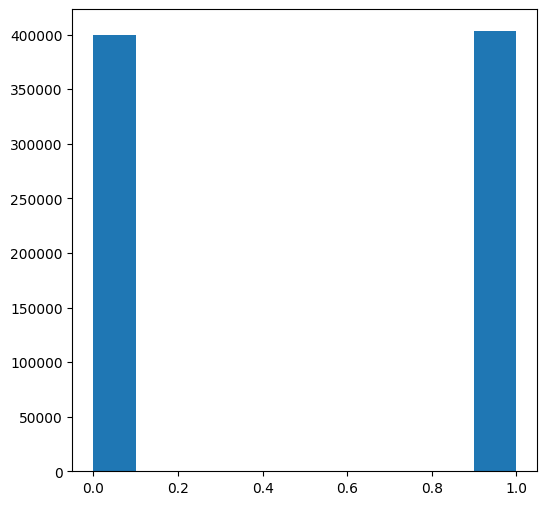

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=456)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train_base, y_train_base)
print("リサンプリング後のクラス分布:")
plt.figure(figsize=(6,6))
plt.hist(y_train_resampled)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_ada, x_test_ada, y_train_ada, y_test_ada = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)
x_train_ada.shape, x_test_ada.shape, y_train_ada.shape, y_test_ada.shape

((562121, 18), (240909, 18), (562121, 1), (240909, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_ada)
x_train_adas = scaler.transform(x_train_ada)
x_test_adas = scaler.transform(x_test_ada)
x_train_adas

array([[-0.15924121, -0.00413573, -1.02614042, ..., -1.28211238,
        -1.33512605, -1.16100519],
       [-0.29073356,  1.32719688, -1.34617545, ..., -0.50230754,
        -1.32703956,  2.40709571],
       [-0.38744646, -1.45627398,  0.0594724 , ..., -0.30034352,
         0.57718798, -0.83827682],
       ...,
       [-0.45888137,  1.21218252,  0.56922458, ..., -1.22282208,
         0.97765696, -1.07261995],
       [ 0.08657702,  0.13065884,  0.62326253, ...,  0.70233434,
        -1.41541832, -0.93836069],
       [-0.49743197, -0.50059465,  0.70188395, ..., -1.12717498,
        -1.68326938, -0.99851533]])

ロジスティック回帰モデルDefault

In [ ]:
from sklearn.linear_model import LogisticRegression

clf8 = LogisticRegression()
clf8.fit(x_train_adas, np.reshape(y_train_ada,(-1)))

LogisticRegression()

In [ ]:
from sklearn.metrics import f1_score
y_pred = clf8.predict(x_test_adas)
f1 = f1_score(y_test_ada, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7382


ロジスティック回帰モデル、class_weightとL2正則化Cのtuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.logspace(-4, 4, 10), #10^-4から10^4までの対数
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,10,10)]
}
clf9 = LogisticRegression(max_iter=5000)
grid_search = GridSearchCV(clf9, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_adas, np.reshape(y_train_ada,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_adas)
f1 = f1_score(y_test_ada, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Best parameters: {'C': 1291.5496650148827, 'class_weight': {0: 1, 1: 2.0}}
F1 Score with best parameters: 0.7618


勾配降下法でロジスティック回帰

In [ ]:
from sklearn.linear_model import SGDClassifier
class_weights = {0: 1, 1: 2}  # クラス1の重みを2倍に設定
clf9 = SGDClassifier(class_weight=class_weights,loss='log_loss', penalty='l2', alpha=0.01, max_iter=5000)
clf9.fit(x_train_adas, np.reshape(y_train_ada,(-1)))

y_pred = clf9.predict(x_test_adas)
f1 = f1_score(y_test_ada, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7560


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,10,10)],
    'alpha': np.logspace(-4, 4, 10)
}
clf10 = SGDClassifier(max_iter=5000)
grid_search = GridSearchCV(clf10, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_adas, np.reshape(y_train_ada,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_adas)
f1 = f1_score(y_test_ada, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Best parameters: {'alpha': 0.000774263682681127, 'class_weight': {0: 1, 1: 2.0}}
F1 Score with best parameters: 0.7628


# 今までの結果一覧(1)

1.SMOTE Resampling前処理で

ロジスティック回帰モデルの場合に、C=0.0464、class_weight={0: 1, 1: 2}、F1 Score=0.7822

勾配降下法でロジスティック回帰の場合に、alpha=0.00077426、class_weight={0: 1, 1: 2}、F1 Score=0.7849

2.ADASYN Resampling前処理で

ロジスティック回帰モデルの場合に、C=1291.5496、class_weight={0: 1, 1: 2}、F1 Score=0.7618

勾配降下法でロジスティック回帰の場合に、alpha=0.00077426、class_weight={0: 1, 1: 2}、F1 Score=0.7628



総じて、SMOTE Resampling前処理することで、勾配降下法でロジスティック回帰の場合に、F1 Score=0.7849は一番高い

# SMOTE前処理のk近傍Tuning

SMOTEのK値はDefault=5
SMOTE Resampling前処理で、モデルTrainingする
ロジスティック回帰モデルの場合(best kとclass_weightを見つける)

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

smote = SMOTE(random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_base, y_train_base)
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)

k_values = [2 ,3, 4]


実行時間をコントロールするために、max_iter=500を設置する
そして、cv=2,classifier__C: np.logspace(-3, 3, 4)をTuningする

In [7]:
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('scaler', StandardScaler()),
    ('classifier',LogisticRegression(max_iter=500))
])
param_grid = {
    'smote__k_neighbors': k_values,
    'classifier__class_weight': [{0: 1, 1: v} for v in np.linspace(1,3,3)],
    'classifier__C': np.logspace(-3, 3, 4)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='f1', verbose=1)
grid_search.fit(x_train_sm, np.reshape(y_train_sm,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_sm)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')


Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters: {'classifier__C': np.float64(0.1), 'classifier__class_weight': {0: 1, 1: np.float64(2.0)}, 'smote__k_neighbors': 2}
F1 Score with best parameters: 0.7821


class_weight={0: 1, 1: 2}, k=2の場合に、Tuningする

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123,k_neighbors=2)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_base, y_train_base)

from sklearn.model_selection import train_test_split
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)
x_train_sm.shape, x_test_sm.shape, y_train_sm.shape, y_test_sm.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_sm)
x_train_sms = scaler.transform(x_train_sm)
x_test_sms = scaler.transform(x_test_sm)

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.logspace(-5, 5, 15) #10^-4から10^4までの対数
}
clf11 = LogisticRegression(max_iter=5000,class_weight={0: 1, 1: 2} )
grid_search = GridSearchCV(clf11, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_sms, np.reshape(y_train_sm,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_sms)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')


Best parameters: {'C': np.float64(0.037275937203149416)}
F1 Score with best parameters: 0.7804


結果は(k=5)0.7821→0.7804逆に小さくなったが、あまり変わらない

SMOTE Resampling前処理で、モデルTrainingする
勾配降下法でロジスティック回帰の場合(best kとclass_weightを見つける)

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

smote = SMOTE(random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_base, y_train_base)
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)

k_values = [2, 3, 4]


実行時間をコントロールするために、max_iter=500を設置する
そして、cv=2,classifier__alpha: np.logspace(-3, 3, 4)をTuningする

In [15]:
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('scaler', StandardScaler()),
    ('classifier',SGDClassifier(max_iter=500))
])
param_grid = {
    'smote__k_neighbors': k_values,
    'classifier__class_weight': [{0: 1, 1: v} for v in np.linspace(1,3,3)],
    'classifier__alpha': np.logspace(-3, 3, 4) 
}
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='f1', verbose=1)
grid_search.fit(x_train_sm, np.reshape(y_train_sm,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_sm)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters: {'classifier__alpha': np.float64(0.001), 'classifier__class_weight': {0: 1, 1: np.float64(2.0)}, 'smote__k_neighbors': 2}
F1 Score with best parameters: 0.7848


class_weight={0: 1, 1: 2}, k=2の場合に、Tuningする

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123,k_neighbors=2)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_base, y_train_base)

from sklearn.model_selection import train_test_split
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)
x_train_sm.shape, x_test_sm.shape, y_train_sm.shape, y_test_sm.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_sm)
x_train_sms = scaler.transform(x_train_sm)
x_test_sms = scaler.transform(x_test_sm)

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.logspace(-5, 5, 15)
}
clf12 = SGDClassifier(max_iter=5000,class_weight = {0: 1, 1: 2})
grid_search = GridSearchCV(clf12, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_sms, np.reshape(y_train_sm,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_sms)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Best parameters: {'alpha': np.float64(0.0013894954943731374)}
F1 Score with best parameters: 0.7830


結果は(k=5)0.7849→0.7830逆に小さくなったが、あまり変わらない

# ADASYN前処理のk近傍Tuning

ADASYNのn値はDefault=5
ADASYN Resampling前処理で、モデルTrainingする
ロジスティック回帰モデルの場合(best nを見つける)

class_weight={0: 1, 1: 2}, n=3,4,6,7,8の場合に、コードを実行する

In [34]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=123,n_neighbors=8)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train_base, y_train_base)

from sklearn.model_selection import train_test_split
x_train_ada, x_test_ada, y_train_ada, y_test_ada = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_ada)
x_train_adas = scaler.transform(x_train_ada)
x_test_adas = scaler.transform(x_test_ada)

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.logspace(-5, 5, 15) #10^-4から10^4までの対数
}
clf13 = LogisticRegression(max_iter=5000,class_weight={0: 1, 1: 2} )
grid_search = GridSearchCV(clf13, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_adas, np.reshape(y_train_ada,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_adas)
f1 = f1_score(y_test_ada, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')


Best parameters: {'C': np.float64(0.19306977288832497)}
F1 Score with best parameters: 0.7618


n=8の場合に、C=0.1930、F1 Score= 0.7618

n=7の場合に、C=0.1930、F1 Score= 0.7624 →　一番高い

n=6の場合に、C=26.8269、F1 Score=0.7617

n=5の場合に(default)、C=1291.5496、F1 Score=0.7618 

n=4の場合に、C=5.1794、F1 Score=0.7607

n=3の場合に、C=138.9495、F1 Score=0.7587

ADASYN Resampling前処理で、モデルTrainingする
勾配降下法でロジスティック回帰の場合(best nを見つける)

class_weight={0: 1, 1: 2}, n=3,4,6,7の場合に、コードを実行する

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=123,n_neighbors=3)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train_base, y_train_base)

from sklearn.model_selection import train_test_split
x_train_ada, x_test_ada, y_train_ada, y_test_ada = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_ada)
x_train_adas = scaler.transform(x_train_ada)
x_test_adas = scaler.transform(x_test_ada)

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.logspace(-5, 5, 15)
}
clf14 = SGDClassifier(max_iter=5000,class_weight = {0: 1, 1: 2})
grid_search = GridSearchCV(clf14, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_adas, np.reshape(y_train_ada,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_adas)
f1 = f1_score(y_test_ada, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Best parameters: {'alpha': np.float64(0.0013894954943731374)}
F1 Score with best parameters: 0.7593


n=7の場合に、alpha=0.0013、F1 Score=0.7629

n=6の場合に、alpha=0.0002、F1 Score=0.7632 →　一番高い

n=5の場合に(default)、alpha=0.0007、F1 Score=0.7628

n=4の場合に、alpha=0.0002、F1 Score=0.7618　

n=3の場合に、alpha=0.0013、F1 Score=0.7593

# 今までの結果一覧(2)

1.SMOTE Resampling前処理で

ロジスティック回帰モデルの場合に、C=0.0464、class_weight={0: 1, 1: 2}、F1 Score=0.7822

勾配降下法でロジスティック回帰の場合に、alpha=0.00077426、class_weight={0: 1, 1: 2}、F1 Score=0.7849 →一番高い

2.ADASYN Resampling前処理で

ロジスティック回帰モデルの場合に、C=1291.5496、class_weight={0: 1, 1: 2}、F1 Score=0.7618

勾配降下法でロジスティック回帰の場合に、alpha=0.00077426、class_weight={0: 1, 1: 2}、F1 Score=0.7628


3.(best k)SMOTE Resampling前処理で →結果逆に悪くなった

ロジスティック回帰モデルの場合に、k=2、C=0.0372、class_weight={0: 1, 1: 2}、F1 Score=0.7804

勾配降下法でロジスティック回帰の場合に、k=2、alpha=0.0013894、class_weight={0: 1, 1: 2}、F1 Score=0.7830

4.(besk n)ADASYN Resampling前処理で

ロジスティック回帰モデルの場合に、n=7、C=0.1930、class_weight={0: 1, 1: 2}、F1 Score=0.7624 

勾配降下法でロジスティック回帰の場合に、n=6、alpha=0.0002、class_weight={0: 1, 1: 2}、F1 Score=0.7632　



SMOTE近傍法最適化することで、結果が悪くなった理由については：

一つのモデルに対して、60回Fittingは実行時間を90分ぐらいかかって、通常Tuningプロセスは2000回Fittingなので、2400分(40時間)以上をかかる

実行時間を短縮させるため、Fitting回数が小さくして、Tuningプロセスと実際に近傍パラメータ(k,n)を導入して実行するプロセスとの設置が不一致なので、十分な有効でないbest k,nをを導入して最終の結果は悪くなった。

# 学習検証

総じて、SMOTE Resampling前処理することで、k=5、alpha=alpha=0.00077426、class_weight={0: 1, 1: 2}、F1 Score=0.7849は一番高い
このモデルを用いて、もう一度データを分割して、検証Valデータを作って、学習曲線を調査する

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123,k_neighbors=5)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train_base, y_train_base)

from sklearn.model_selection import train_test_split
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)
x_train_sm, x_val_sm,  y_train_sm, y_val_sm = train_test_split(x_train_resampled, y_train_resampled, test_size=0.3, random_state=456)

x_train_sm.shape, x_test_sm.shape, y_train_sm.shape, y_test_sm.shape, x_val_sm.shape, y_val_sm.shape

((560077, 18),
 (240034, 18),
 (560077, 1),
 (240034, 1),
 (240034, 18),
 (240034, 1))

x_train_sm.shape = (560077, 18) and y_train_sm.shape = (560077, 1)

x_test_sm.shape = (240034, 18) and y_test_sm.shape = (240034, 1))

x_val_sm.shape = (240034, 18) and y_val_sm.shape = (240034, 1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_sm)
x_train_sms = scaler.transform(x_train_sm)
x_test_sms = scaler.transform(x_test_sm)
x_val_sms = scaler.transform(x_val_sm)

In [20]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.logspace(-5, 5, 15)
}
clf_use = SGDClassifier(max_iter=5000,class_weight = {0: 1, 1: 2})
grid_search = GridSearchCV(clf_use, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_sms, np.reshape(y_train_sm,(-1)))
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

y_pred = grid_search.best_estimator_.predict(x_test_sms)
f1 = f1_score(y_test_sm, y_pred)
print(f'F1 Score with best parameters: {f1:.4f}')

Best parameters: {'alpha': np.float64(0.0013894954943731374)}
F1 Score with best parameters: 0.7604


新しい分割データに対して、F1 Score=0.7604

In [28]:
clf_use.fit(x_train_sms, np.reshape(y_train_sm,(-1)))
print('train score:', clf_use.score(x_train_sms,np.reshape(y_train_sm,(-1))))
print('val score:', clf_use.score(x_val_sms, y_val_sm))

train score: 0.7291086761284609
val score: 0.7287717573343776


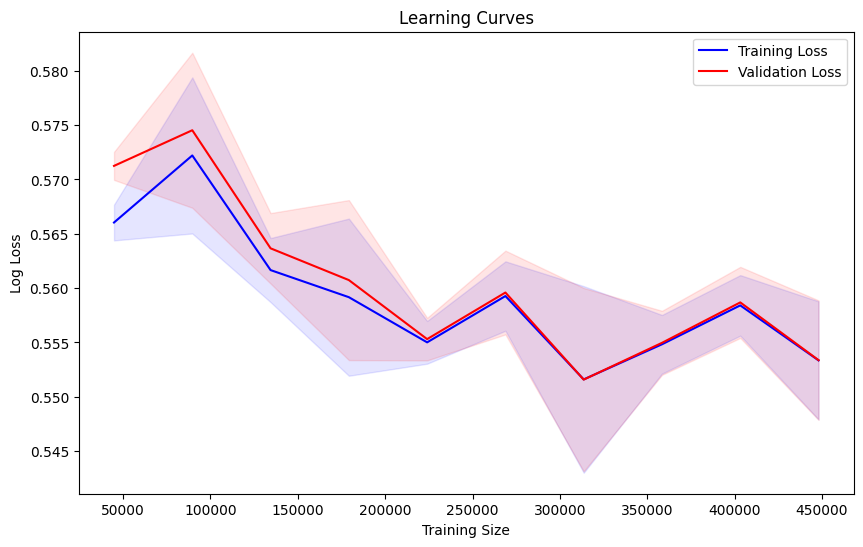

In [44]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, val_scores = learning_curve(
    clf_use, x_train_sms, np.ravel(y_train_sm), cv=5, scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#平均値と標準偏差を計算する
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = -val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

#学習曲線
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Size')
plt.ylabel('Log Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()


18個の係数たちはclf.coef_わかりやすく可視化で

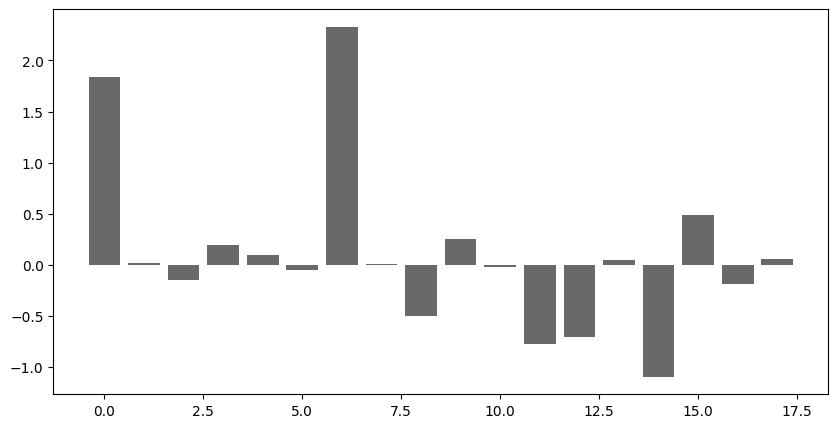

In [29]:
coefs_1d = np.squeeze(clf_use.coef_) 

plt.figure(figsize=(10,5))
plt.bar(range(len(coefs_1d)), coefs_1d, color='dimgray')
plt.show()

In [30]:
alphas = [10000, 1000, 100, 10, 1, 0.1, 0.001, 0.0001] 
scores = []
coefs_and_alphas = []

for alpha in alphas:
    clf_use = SGDClassifier(max_iter=5000,class_weight = {0: 1, 1: 2})
    clf_use.fit(x_train_sms, np.reshape(y_train_sm,(-1)))
    scores.append(clf_use.score(x_val_sms, y_val_sm))
    coefs_and_alphas.append((np.squeeze(clf_use.coef_),alpha))

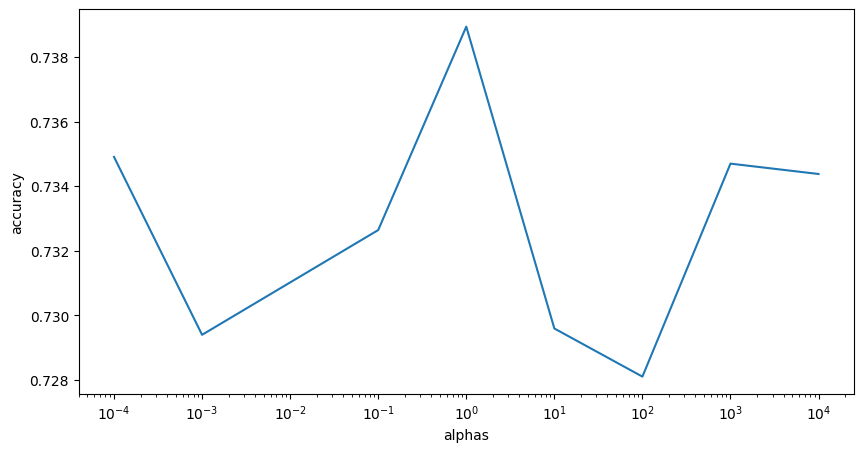

In [31]:
plt.figure(figsize=(10,5))
plt.plot(alphas,scores)
plt.xlabel('alphas')
plt.ylabel('accuracy')
plt.xscale('log')

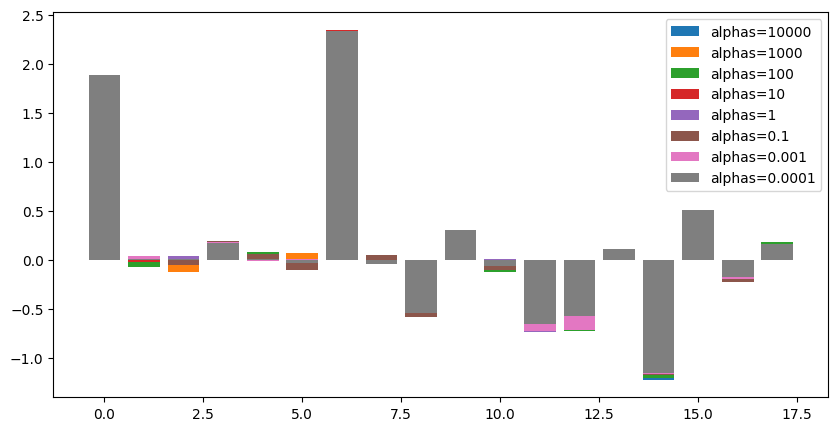

In [33]:
plt.figure(figsize=(10,5))
for (coef, alpha1) in coefs_and_alphas:
    plt.bar(range(len(coef)), coef, label='alphas='+str(alpha1))
plt.legend()
plt.show()

混同行列ROCをチェックする

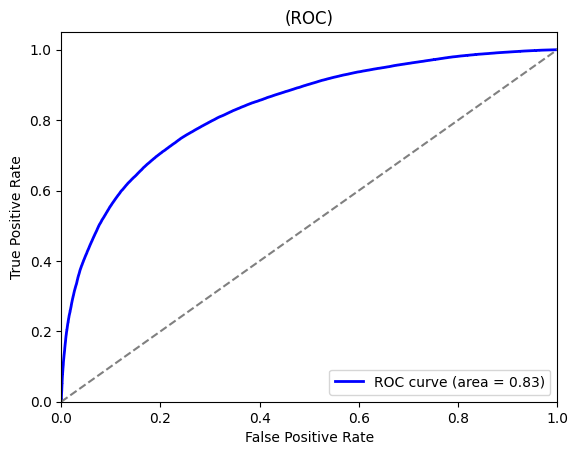

In [40]:
from sklearn.metrics import roc_curve, auc

clf_use = SGDClassifier(max_iter=5000, class_weight={0: 1, 1: 2}, loss='log_loss', random_state=456)
clf_use.fit(x_train_sms, np.ravel(y_train_sm))
y_val_prob = clf_use.predict_proba(x_val_sms)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val_sm, y_val_prob)  #ROC curve
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC)')
plt.legend(loc='lower right')
plt.show()


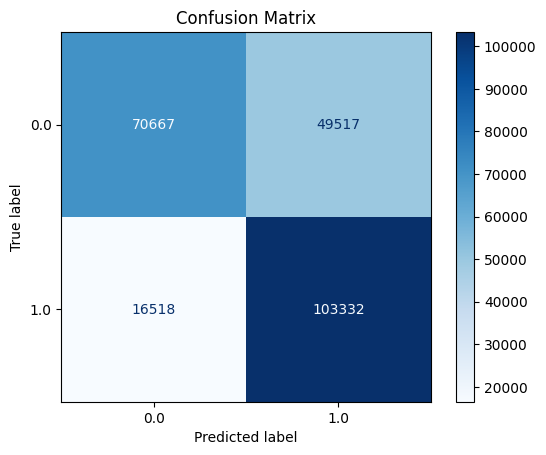

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_val_pred = clf_use.predict(x_val_sms)
cm = confusion_matrix(y_val_sm, y_val_pred) #confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_use.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# BaseTestDataから予測値の出力

In [45]:
x_test_base.shape

(200000, 18)

In [52]:
scaler = StandardScaler()
scaler.fit(x_train_sm) 
x_test_bscaled = scaler.transform(x_test_base)

clf_use = SGDClassifier(max_iter=5000, class_weight={0: 1, 1: 2},alpha=0.00077426)
clf_use.fit(x_train_sms, np.reshape(y_train_sm, (-1)))

y_test_pred_output = clf_use.predict(x_test_bscaled)
y_test_pred_df = pd.DataFrame(y_test_pred_output, columns=['Prediction'])
y_test_pred_df

,Prediction
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
199995,0.0
199996,1.0
199997,1.0
199998,1.0


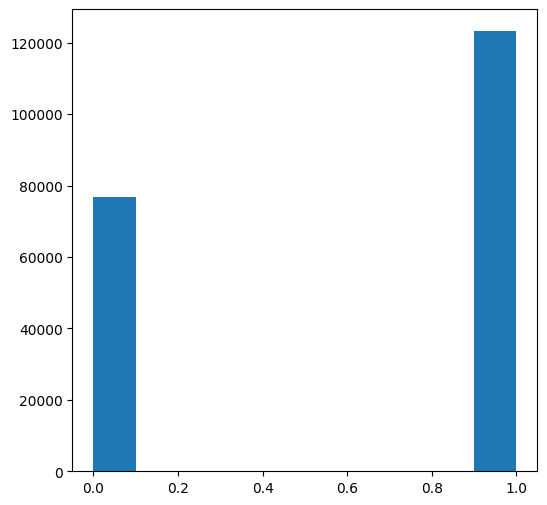

In [53]:
plt.figure(figsize=(6,6))
plt.hist(y_test_pred_df)
plt.show()

In [54]:
y_test_pred_df.to_csv('C:/Users/histan/Desktop/Personal Files/立教大学/M1授業/機械学習/コンペ/y_test_predictions.csv', index=False, header=False)